# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanego polecenia !wget), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
if 'lut.py' not in os.listdir():
    ! wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py

import lut

In [6]:
lut.kwadratowa

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   2,   2,   2,   2,   2,   3,
         3,   3,   3,   3,   4,   4,   4,   4,   5,   5,   5,   6,   6,
         6,   7,   7,   7,   8,   8,   8,   9,   9,   9,  10,  10,  11,
        11,  11,  12,  12,  13,  13,  14,  14,  14,  15,  15,  16,  16,
        17,  17,  18,  19,  19,  20,  20,  21,  21,  22,  22,  23,  24,
        24,  25,  26,  26,  27,  27,  28,  29,  29,  30,  31,  32,  32,
        33,  34,  34,  35,  36,  37,  37,  38,  39,  40,  40,  41,  42,
        43,  44,  45,  45,  46,  47,  48,  49,  50,  51,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  80,
        81,  82,  83,  84,  85,  86,  88,  89,  90,  91,  92,  93,  95,
        96,  97,  98, 100, 101, 102, 103, 105, 106, 107, 109, 110, 111,
       112, 114, 115, 116, 118, 119, 121, 122, 123, 125, 126, 12

In [7]:
lut.kwadratowa.dtype

dtype('int64')

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

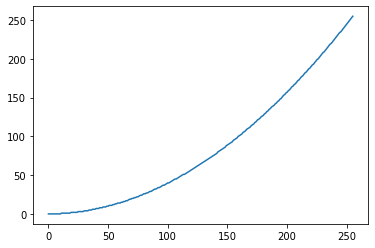

In [50]:
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

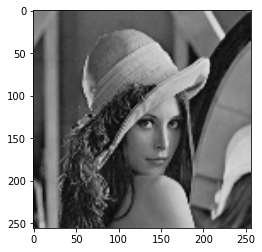

In [60]:
if 'lena.bmp' not in os.listdir():
    ! wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
if 'jet.bmp' not in os.listdir():
    ! wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp
img = cv2.imread('lena.bmp')
plt.imshow(img)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

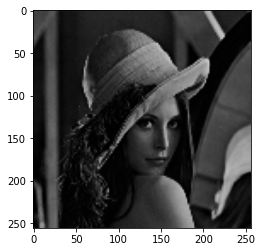

In [9]:
img_kw = cv2.LUT(img, lut.kwadratowa)
plt.imshow(img_kw)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [47]:
def LUT(img, tab):
    img2 = cv2.LUT(img, tab)
    fig, ax = plt.subplots(1,3,sharex=True,sharey=True)
    plt.xticks([]);plt.yticks([])
    ax[0].plot(tab)
    ax[0].set_title('Tablica\nprzekodowań')
    ax[0].set_aspect('equal')
    ax[1].imshow(img)
    ax[1].set_title('Obraz\noryginalny')
    ax[2].imshow(img2)
    ax[2].set_title('Obraz\nprzetransformowany')

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

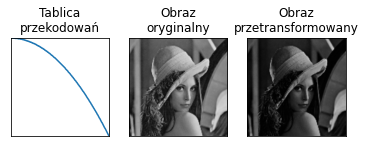

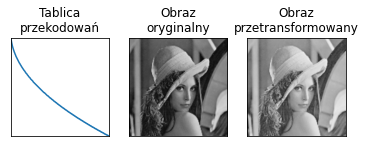

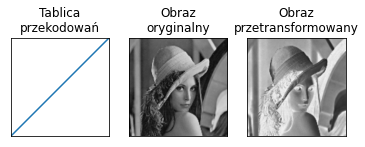

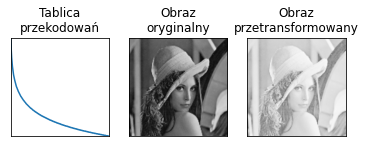

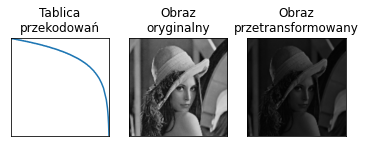

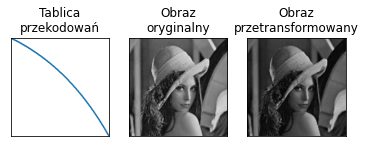

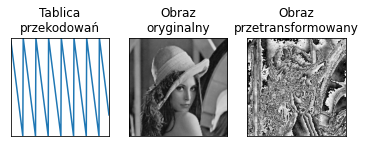

In [48]:
for i in ['kwadratowa', 'pierwiastkowa', 'odwrotna','log', 'odwlog','wykladnicza','pila']:
    exec("LUT(img, lut."+i+")")

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

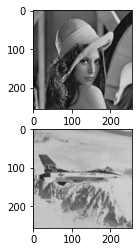

In [77]:
jet = cv2.imread('jet.bmp')
fig, ax = plt.subplots(2,1)
ax[0].imshow(img)
ax[1].imshow(jet)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

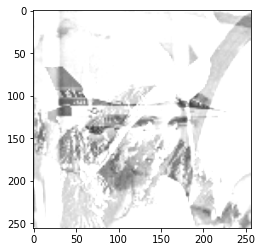

In [79]:
res_add = cv2.add(img, jet)
plt.imshow(res_add)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`).
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić. _
Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki._

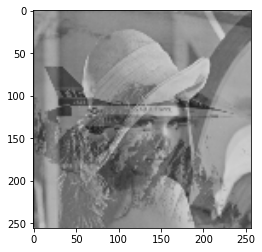

In [80]:
res_add_2 = cv2.add(img.astype('uint16'), jet.astype('uint16'))//2
plt.imshow(res_add_2)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

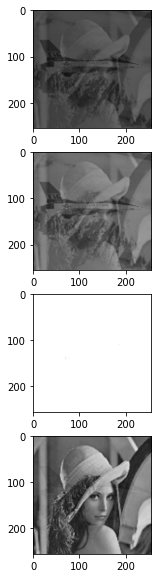

In [92]:
fig, ax = plt.subplots(4,1,figsize=(30,10))
for n,i,j,k in ((0,.2,.3,0),(1,.3,.4,7),(2,3,4,1),(3,.9,.1,1)): 
    ax[n].imshow(cv2.addWeighted(img,i,jet,j,k))

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

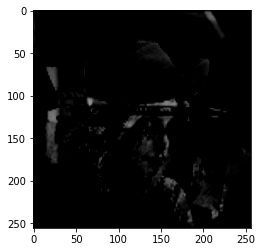

In [93]:
plt.imshow(cv2.subtract(img,jet))

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ obrazów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

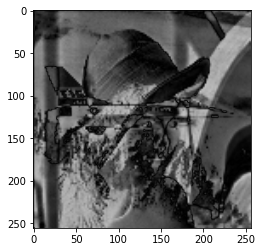

In [96]:
plt.imshow(np.abs(cv2.subtract(img.astype('int16'), jet.astype('int16'))))

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

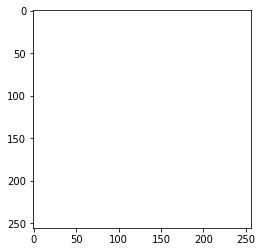

In [97]:
plt.imshow(cv2.multiply(img, jet))

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

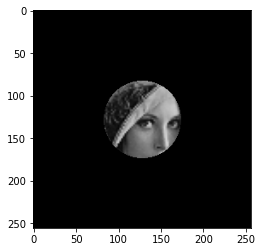

In [118]:
if 'kolo.bmp' not in os.listdir():
    ! wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp
kolo = cv2.imread('kolo.bmp')
plt.imshow(cv2.multiply(img, np.minimum(1,kolo)))

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

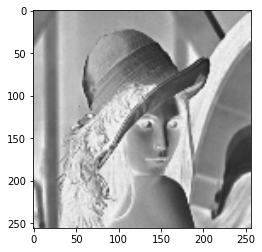

In [119]:
plt.imshow(cv2.bitwise_not(img))

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

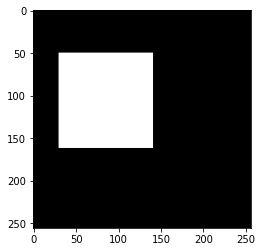

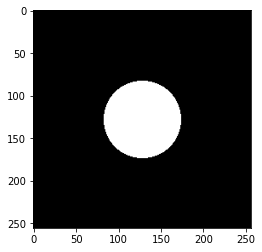

In [130]:
if 'kwadrat.bmp' not in os.listdir():
    ! wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp

kwadrat = cv2.imread('kwadrat.bmp')  
plt.imshow(kwadrat)
plt.show()
plt.imshow(kolo)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

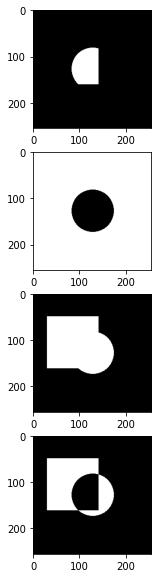

In [132]:
fig, ax= plt.subplots(4,1,figsize=(20,10))
ax[0].imshow(cv2.bitwise_and(kolo,kwadrat))
ax[1].imshow(cv2.bitwise_not(kolo))
ax[2].imshow(cv2.bitwise_or(kolo,kwadrat))
ax[3].imshow(cv2.bitwise_xor(kwadrat, kolo))

## Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

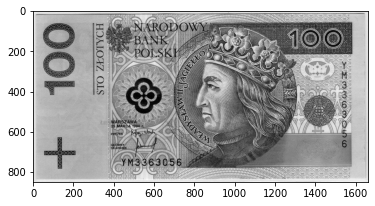

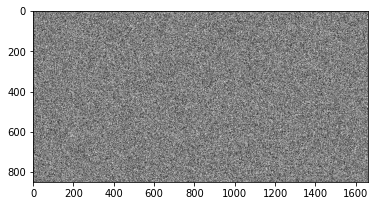

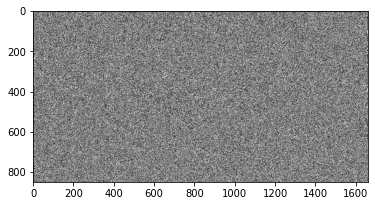

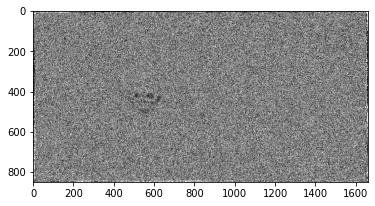

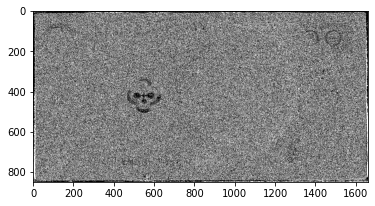

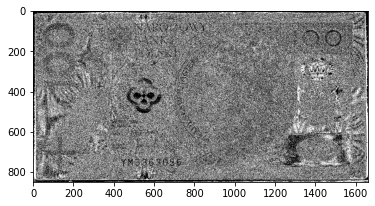

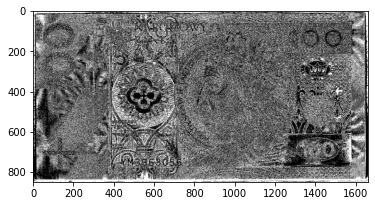

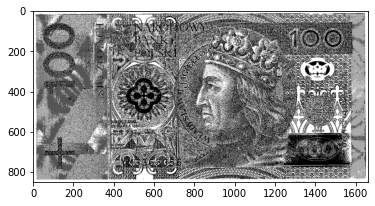

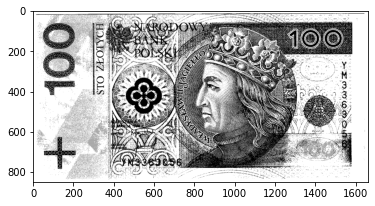

<Figure size 432x288 with 0 Axes>

In [189]:
if not os.path.exists("100zloty.jpg"):
  !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg

stowka = cv2.imread("100zloty.jpg")
sad_stowka = cv2.cvtColor(stowka, cv2.COLOR_RGB2GRAY)
plt.imshow(sad_stowka)
plt.gray()
plt.show()
for i in range(8):
    plt.imshow(cv2.bitwise_and(sad_stowka, int(2**i)))
    plt.gray()
    plt.show()
    plt.clf()

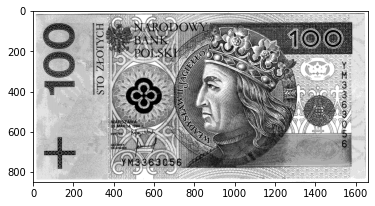

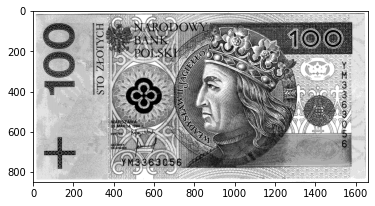

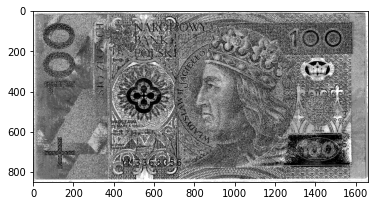

In [192]:
v7=cv2.bitwise_and(sad_stowka, int(2**7))
v6=cv2.bitwise_and(sad_stowka, int(2**6))
v5=cv2.bitwise_and(sad_stowka, int(2**5))
plt.imshow(cv2.add(v7,v6))
plt.show()
plt.clf()
plt.imshow(cv2.add(v7,v6))
plt.show()
plt.clf()
plt.imshow(cv2.add(v6,v5))
plt.show()